In [1]:


from IPython.display import display, Math, Latex 
from IPython.html.widgets import *
from matplotlib.pyplot import *
from numpy import *
from numpy.random import *
%matplotlib inline  

/Users/audunhansen/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


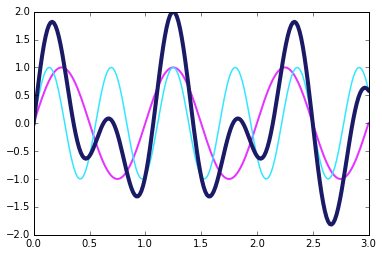

In [2]:
def bitreduce(f,N):
    fret = zeros(len(f))
    for i in range(len(f)):
        fret[i] = int((N+1)*f[i])/float(N+1) 
    return fret


def f(f,samples, phase, bitdepth, dithering):
    N = bitdepth #int(2**bitdepth) 
    t = samples+1
    d = uniform(-dithering,dithering,1000)
    d = dithering*sin(linspace(0,400000,1000))
    
    signal1000 = d + sin(phase + 2*pi*f*linspace(0,1,1000))
    signal_N = bitreduce(signal1000[list(linspace(0,999,t))], N)
    #signal_N = bitreduce(sin(phase + 2*pi*f*linspace(0,1,t)), N)
    figure(1)
    plot(linspace(0,1,1000), signal1000, "-", color = (.8,.8,.8))    
    hold("on")
    plot(linspace(0,1,t), signal_N, ".")
    plot(linspace(0,1,t), signal_N, color = (.8,.3,.3))
    hold("off")
    
def f2(phase, f1, f2, region):
    x = linspace(0,region,200)
    s1 = sin(2*pi*(f1*x + phase))
    s2 = sin(2*pi*f2*x)
    hold("on")
    plot(x, s1, linewidth = 2.0, color = (.9,.2,1.0))
    plot(x, s2, linewidth = 1.5, color = (.2,.9,1.0))
    plot(x, s1+s2, linewidth = 4.0, color = (.1,.1,0.4))
    show()

def f3(t):
    x = linspace(0,10,20)
    s1 = sin(2*pi*(f1*x + phase))*exp(-(x-.5)**2)
    hold("on")
    plot(x, s1, "o", linewidth = 2.0, color = (.9,.2,1.0))
    show()

#interact(f, f=(.1,10,.1), samples=(2,200,1), phase = (0,pi, .1), bitdepth = (1,16,1), dithering = (0,1,.01))

interact(f2, phase = (0,2,.1), f1 = (1,10,.1), f2 = (1,10,.1), region = (1,10,1))

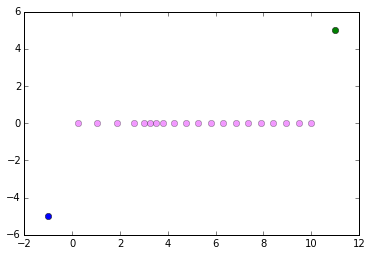

In [165]:
def f3(t):
    x = linspace(0,10,20)
    x2 = linspace(0,10,200)
    s1 = exp(-((x-t)-.5)**2/2) #*sin(pi*(x -  t))
    s2 = exp(-((x2-t)-.5)**2/2) #*sin(pi*(x2 -  t))
    hold("on")
    
    #plot(x2, s2, "-", linewidth = 2.0, color = (.2,.9,1.0))
    plot(x+s1, 0*s1, "o", linewidth = 2.0, color = (.9,.2,1.0), alpha = .5)
    #plot(x, s1, "o", linewidth = 2.0, color = (.9,.2,1.0), alpha = .5)
    
    #plot(x, s1, "o", linewidth = 2.0, color = (.9,.2,1.0))
    
    plot(-1,-5, "o")
    plot(11,5, "o")
    show()

#interact(f, f=(.1,10,.1), samples=(2,200,1), phase = (0,pi, .1), bitdepth = (1,16,1), dithering = (0,1,.01))

interact(f3, t = (0,10,.1))

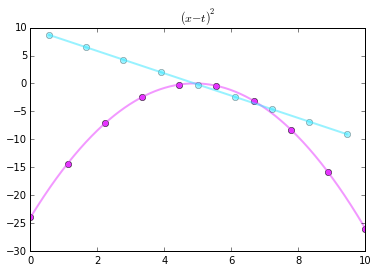

In [157]:
def dF(F,x):
    return [(F[1:]-F[0:-1])/(x[1:]-x[0:-1]), x[1:] - .5*(x[1:]-x[0:-1])] #dF/dx
    

def f4(t, tpe = 0, pts = 10):
    
    x = linspace(0,10,pts)
    
    xs = linspace(0,10,400)
    F = lambda x : (x-t)**2
    tit = "$(x-t)^2$"
    if tpe == 0:
        F = lambda x : cos(x-t)/(1 + abs(x-t))
        tit = "$\\frac{cos(x-t)}{1 + \\vert x-t \\vert}$"
    if tpe == 1:
        F = lambda x : exp(-(x-t)**2)
        tit = "$exp(-(x-t)^2)$"
    if tpe == 2:
        F = lambda x : abs(x-t)
        tit = "$\\vert x - t\\vert$"
    if tpe == 3:
        F = lambda x : -(x-t)**2
    #x = linspace(0,10,10)
    #x2 = linspace(0,10,200)
    #s1 = exp(-((x-t)-.5)**2/2)*sin(pi*(x -  t))
    #s2 = exp(-((x2-t)-.5)**2/2)*sin(pi*(x2 -  t))
    hold("on")
    
    plot(x,F(x), "o", linewidth = 2.0, color = (.9,.2,1.0))
    plot(xs, F(xs), "-", linewidth = 2.0, color = (.9,.2,1.0), alpha = .5)
    df, dx = dF(F(x),x)
    ddf, ddx = dF(df,dx)
    dddf, dddx = dF(ddf,ddx)
    
    
    plot(dx,df, "o", linewidth = 2.0, color = (.2,.9,1.0), alpha = .5)
    plot(dx,df, "-", linewidth = 2.0, color = (.2,.9,1.0), alpha = .5)
    #plot(ddx,ddf, "-", linewidth = 1.0, color = (.2,.9,0.2), alpha = .4)
    #plot(dddx,dddf, "-", linewidth = 1.0, color = (.2,.5,0.2), alpha = .3)
    
    #plot(x, s1, "o", linewidth = 2.0, color = (.9,.2,1.0))
    title(tit)
    #plot(-1,-5, "o")
    #plot(11,5, "o")
    show()

#interact(f, f=(.1,10,.1), samples=(2,200,1), phase = (0,pi, .1), bitdepth = (1,16,1), dithering = (0,1,.01))

interact(f4, t = (0,10,.1), tpe = (0,4,1), pts = (10,200,1))

In [53]:
from IPython.core.display import HTML
from scipy.io import wavfile

def wavPlayer(filepath):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/mp3" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [54]:
pwd()

u'/Users/audunhansen/Dropbox/Master Thesis Audun Skau Hansen/Notebooks'

In [55]:
wavPlayer("/../../Privat/Media/")

In [145]:
wavPlayer(u"/Users/kinealicegulbrandsen/Dropbox/Privat/Media/")

In [130]:
x = linspace(0,10,10+1)
print list(x)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [56]:
from scipy.io import wavfile
import cv2

ImportError: No module named cv2

In [148]:
fx = lambda x, i : x%(1.0/i)/(2*i)
fx = lambda x, i : sin(2*pi*i*x)

x = linspace(0,3,3*44100)
z = zeros(len(x))

for i in range(60):
    #z += (i+1)*fx(x,i+100)
    z += 10000*fx(x,i+100)
    
    
z = fx(x, 550*(1 + .01*fx(x, 20)))+fx(x, 550*(1 - .01*fx(x, 20)))
scaled = int16(z/max(abs(z)) * 32767)
wavfile.write('test.wav', 44100, scaled)

In [149]:
wavPlayer("test.wav")

In [39]:
pwd()

u'/Users/kinealicegulbrandsen/Dropbox/master thesis audun skau hansen/Notebooks'